# Normality assumption
- Decision:
    - If Data Is Gaussian, use Parametric Statistical Methods.
    - Else, Use Nonparametric Statistical Methods.
    - Middle ground: Assume that the data is Gaussian-enough to use parametric methods or that use data preparation techniques to transform the data to be sufficiently Gaussian to use the parametric methods.

# Techniques for checking whether a sample of data is Gaussian
1. Graphical Methods: These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.
2. Statistical Tests: These are methods that calculate statistics on the data and quantify how likely it is that the data was drawn from a Gaussian distribution.

# The Dataset

In [26]:
# My sample data 
# Reference: https://archive.ics.uci.edu/ml/datasets/Abalone
import pandas as pd
data = pd.read_csv('abalone.csv')

## 1. Visual Normality Checks
- 1.1 Histogram Plot: A simple and commonly used plot to quickly check the distribution of a sample of data.
- 1.2 Quantile-Quantile Plot: A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Deviations by the dots from the line shows a deviation from the expected distribution.

### 1.1 Histogram Plot

In [4]:
def plot_distribution(colname):
    '''
    Objective: Plot a histogram graph.
    colname: Put the column name in a dataset.
    '''
    
    sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
    ax = sb.distplot(data[colname], kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
    ax.set(title = colname, ylabel = 'Frequency')
    plt.show()

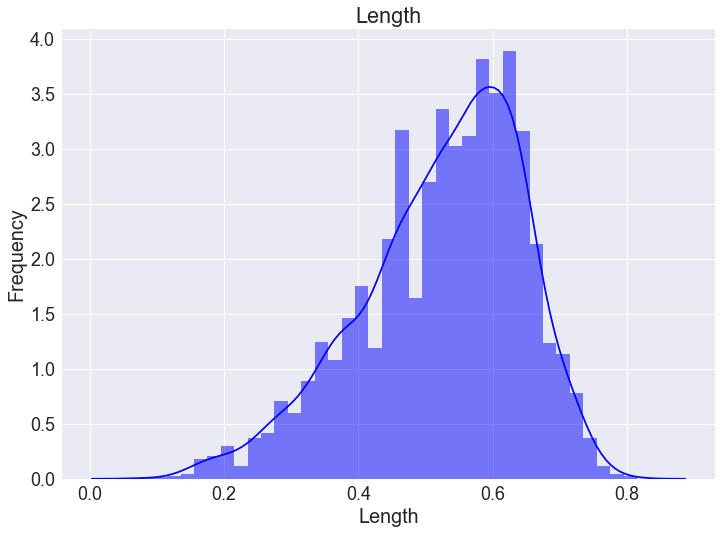

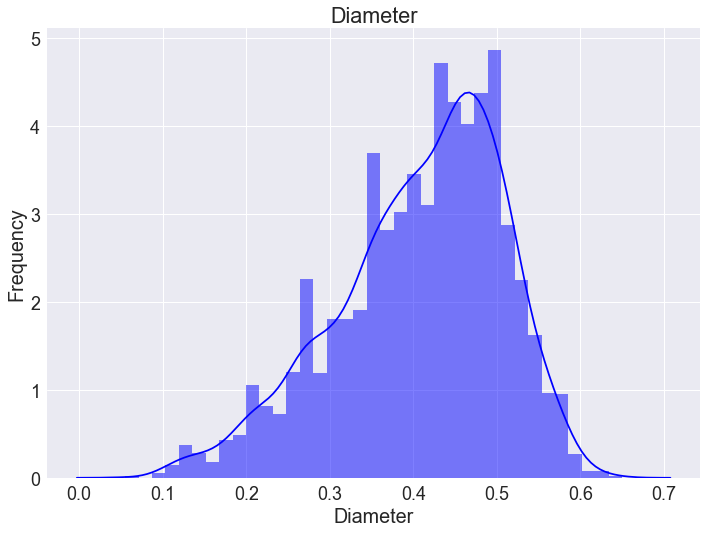

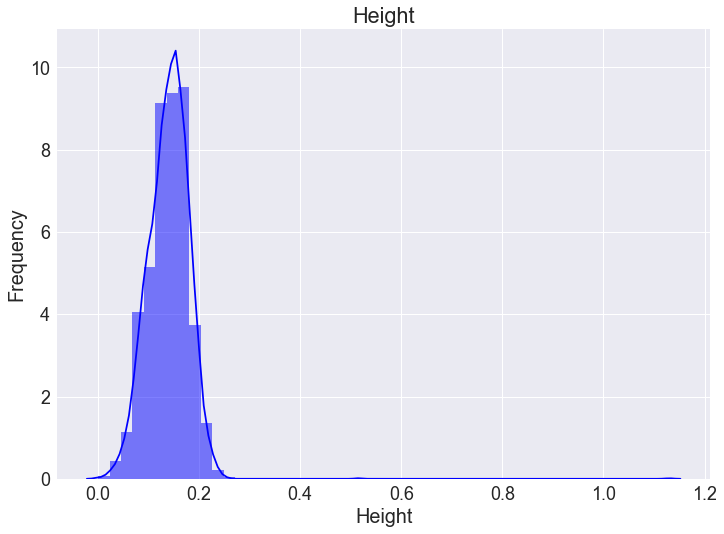

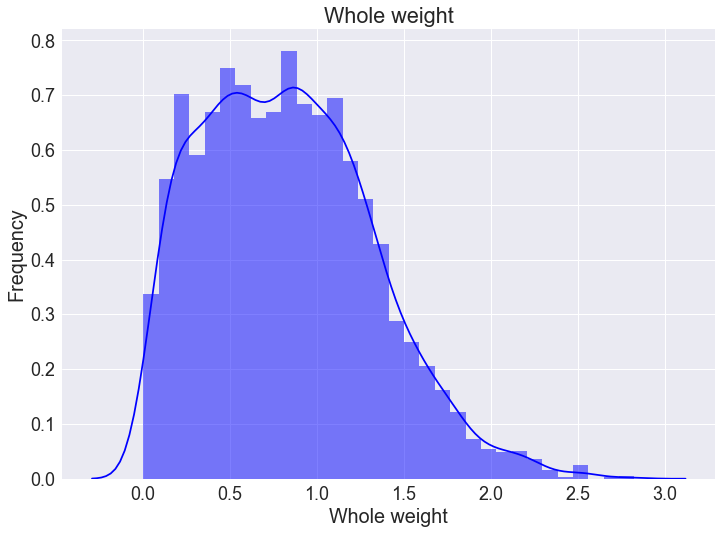

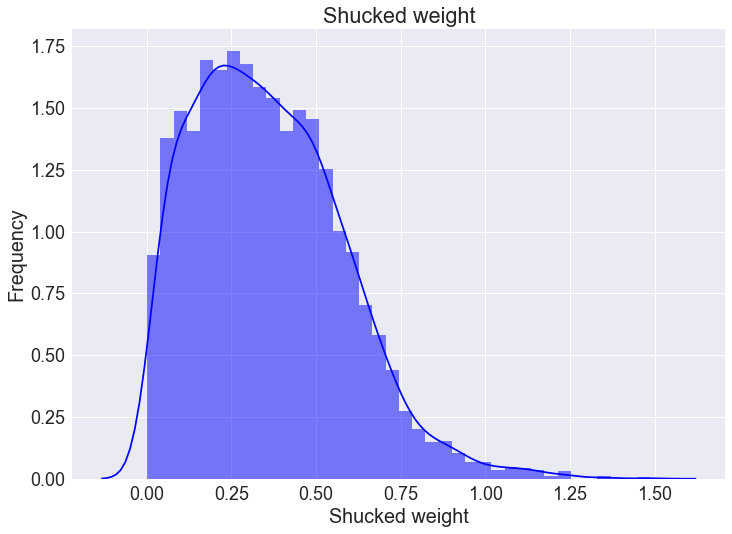

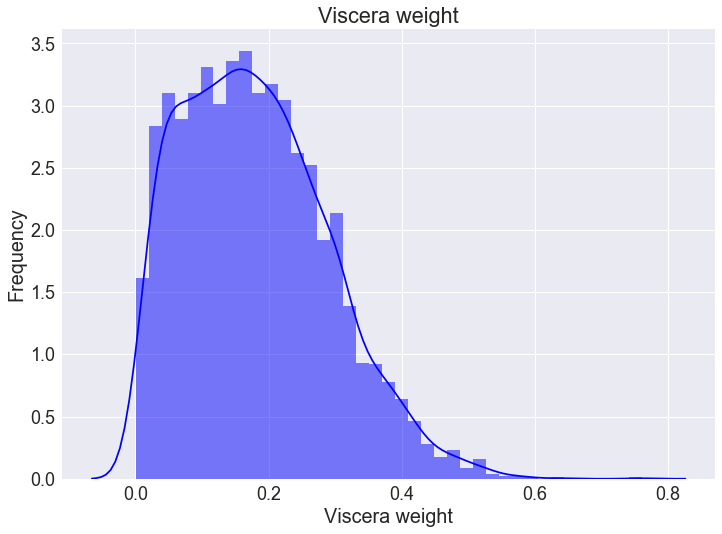

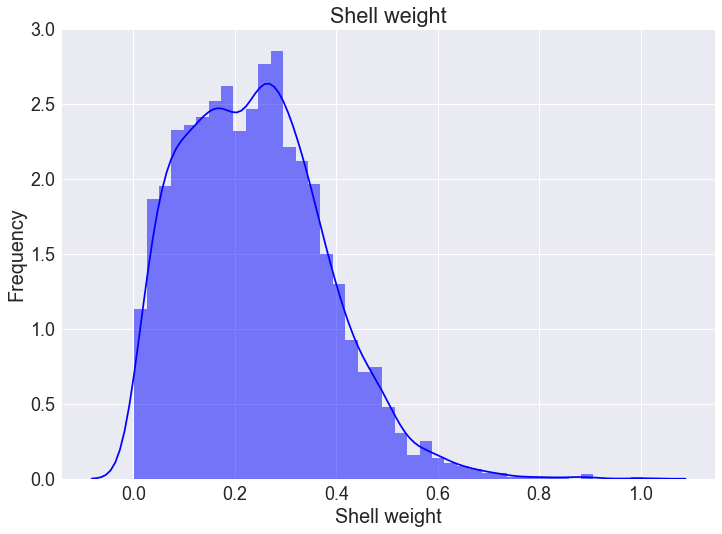

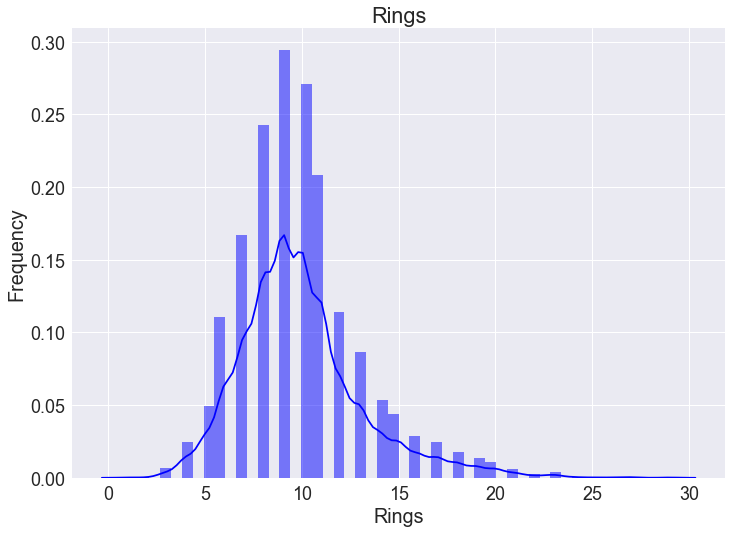

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

for each in data.columns[1:]:
    plot_distribution(each)

### 1.2 Quantile-Quantile Plot

In [10]:
from statsmodels.graphics.gofplots import qqplot

In [11]:
def qq_plot(colname):
    '''
    Q-Q plot.
    colname: Put the column name in a dataset.
    '''
    qqplot(data[colname], line='s')
    plt.title(colname)
    plt.show()

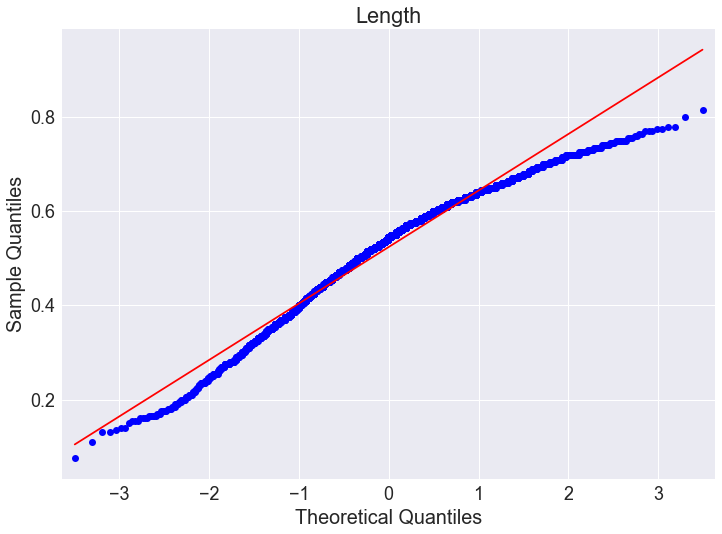

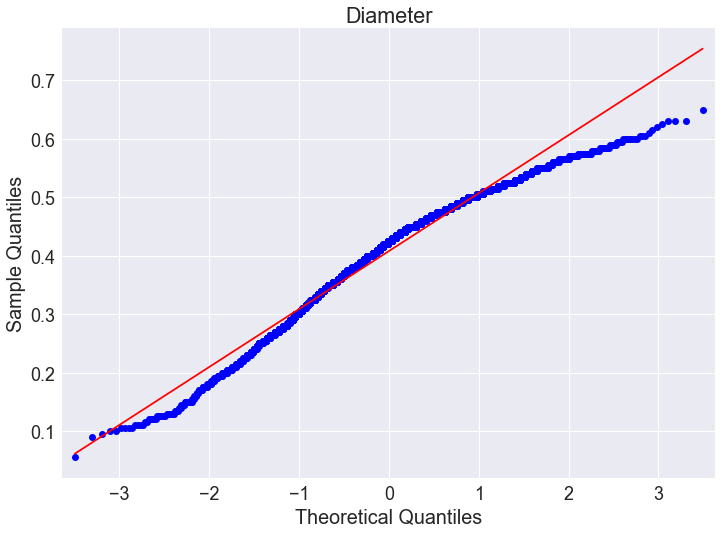

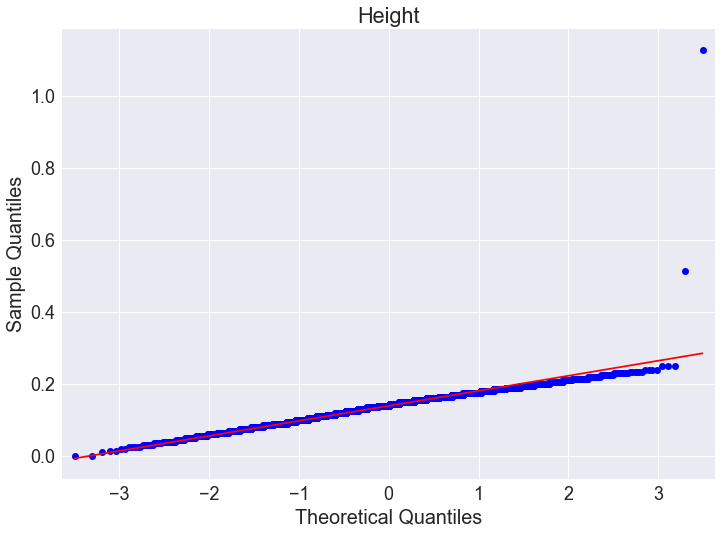

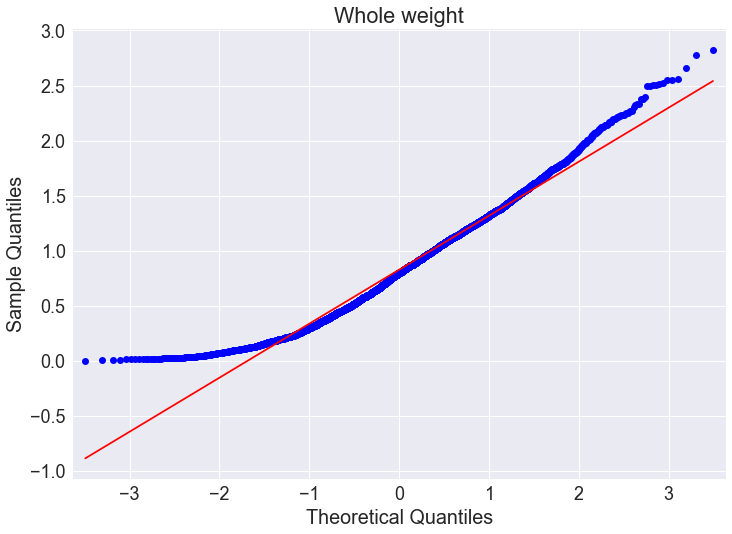

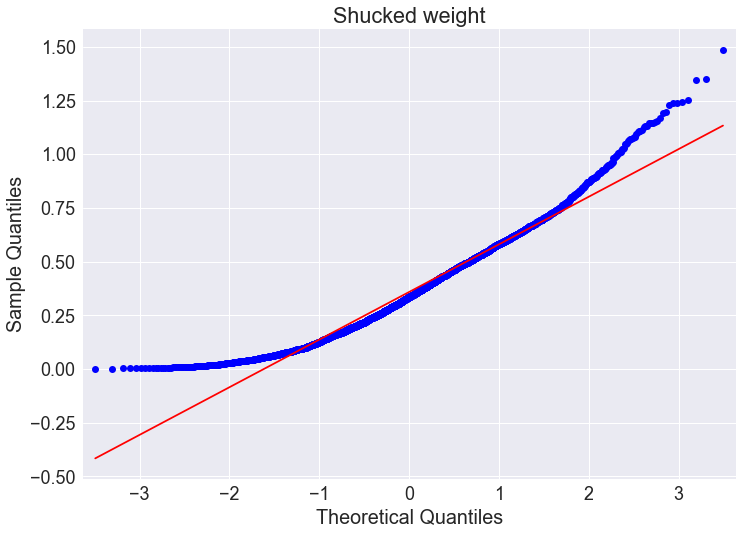

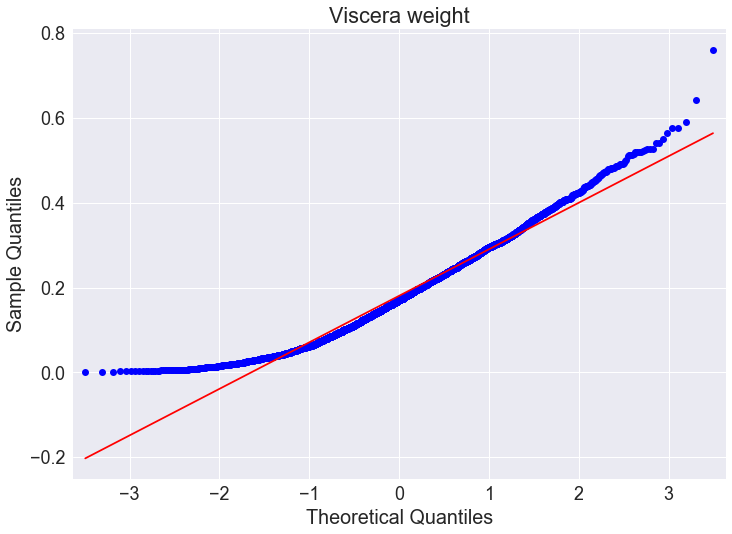

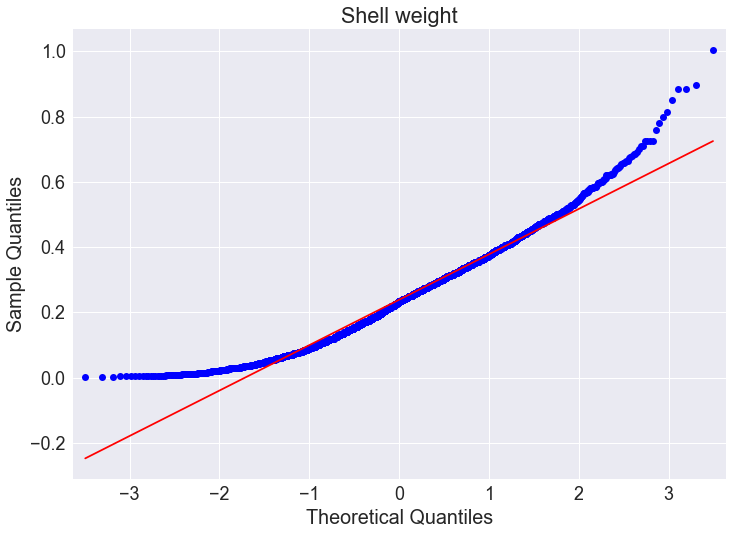

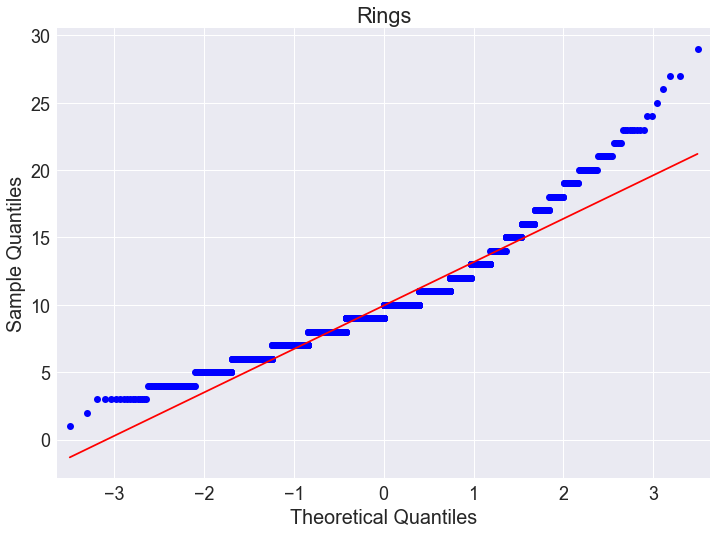

In [12]:
# For instance, Length has several data points landed outside the line
for each in data.columns[1:]:
    qq_plot(each)

## 2. Statistical Normality Tests
- 2.1 Shapiro-Wilk Test: Evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.
- 2.2 D’Agostino’s K^2 Test: Calculates summary statistics from the data, namely **kurtosis** and **skewness**, to determine if the data distribution departs from the normal distribution.
    - Skew: a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
    - Kurtosis: quantifies how much of the distribution is in the tail.
- 2.3 Anderson-Darling Test: 

### 2.1 Shapiro-Wilk Test

In [13]:
from scipy.stats import shapiro

In [14]:
def perform_shapiro_test(colname):
    '''
    Perform Shapiro-Wilk Test on normality.
    If p value is less than the threshold (alpha) value, then we reject the H0 (null hypothesis).
    colname: Put the column name in a dataset.
    '''
    
    stat, p = shapiro(data[colname])
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)', p, colname)
    else:
        print('Sample does not look Gaussian (reject H0)', p, colname)

In [15]:
# For my sample data, all of them didn't follow a Gaussian distribution using Shapiro-Wilk Test
for each in data.columns[1:]:
    perform_shapiro_test(each)

Sample does not look Gaussian (reject H0) 7.377629143455696e-29 Length
Sample does not look Gaussian (reject H0) 1.6414551656441721e-28 Diameter
Sample does not look Gaussian (reject H0) 0.0 Height
Sample does not look Gaussian (reject H0) 1.0143092052495122e-27 Whole weight
Sample does not look Gaussian (reject H0) 9.362563887244321e-32 Shucked weight
Sample does not look Gaussian (reject H0) 1.774917175594725e-29 Viscera weight
Sample does not look Gaussian (reject H0) 1.568463383716868e-28 Shell weight
Sample does not look Gaussian (reject H0) 3.2763058745146386e-40 Rings


### 2.2 D’Agostino’s K^2 Test

In [16]:
from scipy.stats import normaltest

In [19]:
def perform_D_K_test(colname):
    '''
    Perform D’Agostino’s K^2 Test on normality.
    If p value is less than the threshold (alpha) value, then we reject the H0 (null hypothesis).
    colname: Put the column name in a dataset.
    '''
    stat, p = normaltest(data[colname])
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)', p, colname)
    else:
        print('Sample does not look Gaussian (reject H0)', p, colname)

In [20]:
# For my sample data, all of them didn't follow a Gaussian distribution using D’Agostino’s K^2 Test
for each in data.columns[1:]:
    perform_D_K_test(each)

Sample does not look Gaussian (reject H0) 2.605281543244203e-53 Length
Sample does not look Gaussian (reject H0) 5.820423598604325e-49 Diameter
Sample does not look Gaussian (reject H0) 0.0 Height
Sample does not look Gaussian (reject H0) 1.477633096123117e-38 Whole weight
Sample does not look Gaussian (reject H0) 7.525933047659418e-73 Shucked weight
Sample does not look Gaussian (reject H0) 8.578998367689648e-47 Viscera weight
Sample does not look Gaussian (reject H0) 1.988400082098343e-57 Shell weight
Sample does not look Gaussian (reject H0) 2.300144867340782e-177 Rings


### 2.3 Anderson-Darling Test

In [21]:
from scipy.stats import anderson

In [24]:
def perform_anderson_test(colname):
    result = anderson(data[colname])
    print(colname, 'Statistic: %.3f' % result.statistic)
    p = 0
    
    # Compare test statistic with different critical values 
    for i in range(len(result.critical_values)):
        # significance level and critical value
        sl, cv = result.significance_level[i], result.critical_values[i]
        # threshold determination
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [25]:
# For my sample data, all of them didn't follow a Gaussian distribution using D’Agostino’s K^2 Test
for each in data.columns[1:]:
    perform_anderson_test(each)
    print()

Length Statistic: 36.621
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)

Diameter Statistic: 36.438
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)

Height Statistic: 14.493
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)

Whole weight Statistic: 20.993
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H

# Extra: Use a sample data randomly generated

In [36]:
import numpy as np
data = 3 * np.random.randn(100) + 10

In [37]:
# The mean and std are very close to the values I specified when generating
print(np.mean(data), np.std(data))

10.188630507742849 3.4580678258359807


## 1. Visualization methods

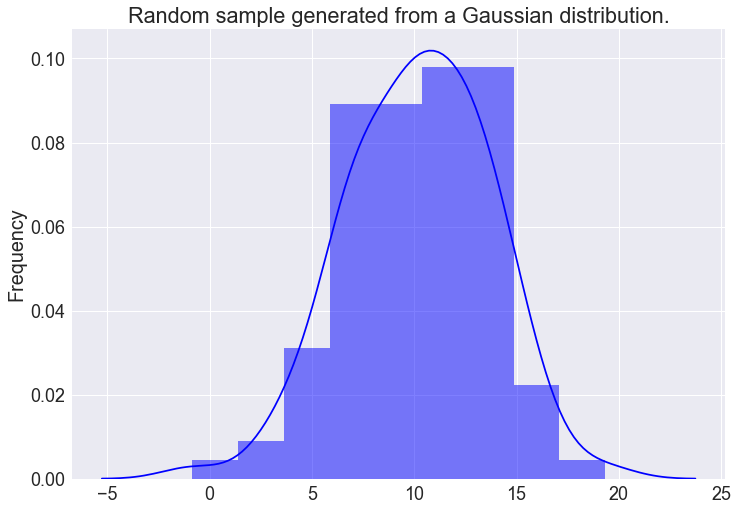

In [42]:
# The shape is very close to a bell-shape
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Random sample generated from a Gaussian distribution.', ylabel = 'Frequency')
plt.show()

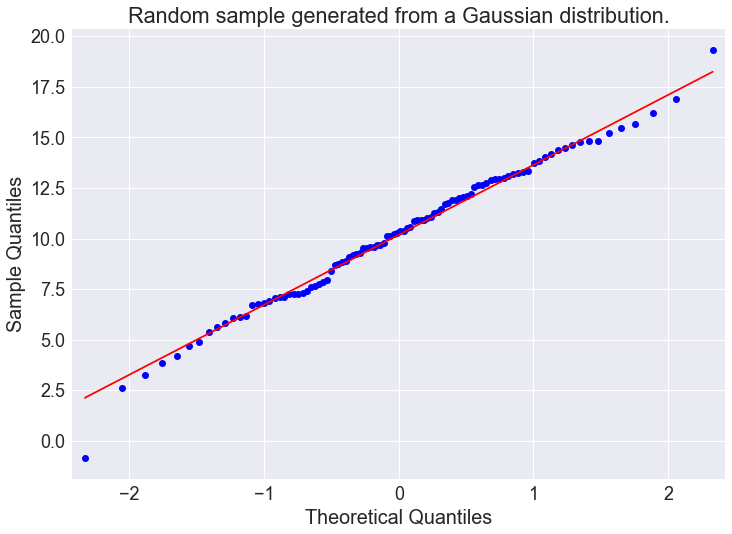

In [41]:
# Only few dots are deviated from the red line
qqplot(data, line='s')
plt.title('Random sample generated from a Gaussian distribution.')
plt.show()

## 2. Statistical Tests

In [48]:
# Test I
stat, p = shapiro(data)
alpha = 0.05
print('Test statistic is:', round(stat, 4))
print('P-value is:', round(p, 4))

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

Test statistic is: 0.9925
P-value is: 0.8532
Sample looks Gaussian (fail to reject H0).


In [49]:
# Test II
stat, p = normaltest(data)
alpha = 0.05
print('Test statistic is:', round(stat, 4))
print('P-value is:', round(p, 4))

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Test statistic is: 1.6128
P-value is: 0.4465
Sample looks Gaussian (fail to reject H0)


In [52]:
# Test III
result = anderson(data)
print('Test Statistic: %.3f' % result.statistic)

for i in range(len(result.critical_values)):
    # significance level and critical value
    sl, cv = result.significance_level[i], result.critical_values[i]
    # threshold determination
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Test Statistic: 0.232
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)
